In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from tensorflow.keras.datasets.mnist import load_data

(xTrain, yTrain), (xTest, yTest) = load_data()

In [30]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [31]:
xTrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [32]:
pd.DataFrame(xTrain[0]).to_clipboard()

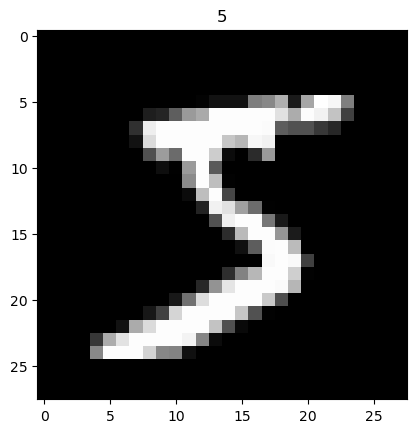

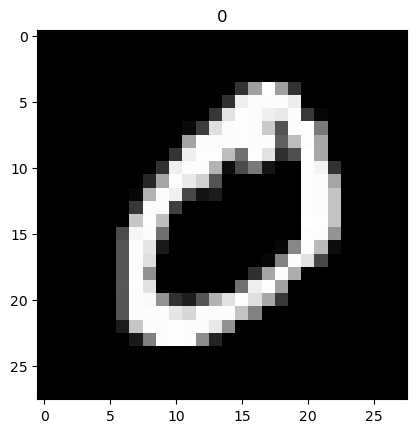

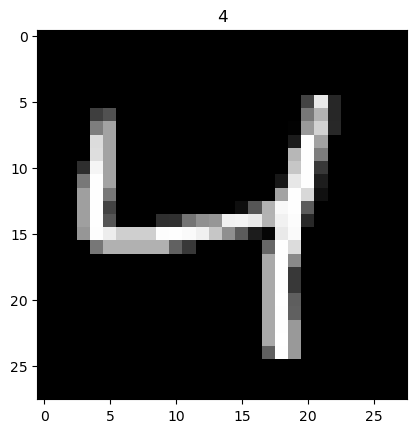

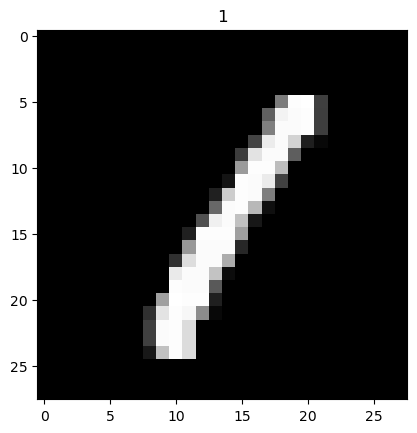

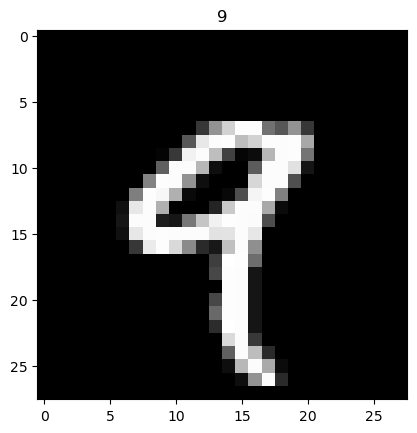

In [33]:
for i in range(5):
    plt.imshow(xTrain[i], cmap = "grey")
    plt.title(yTrain[i])
    plt.show()

In [34]:
xTrain[0].shape

(28, 28)

In [35]:
# Flattening the image array
xTrain = xTrain.reshape(-1, 784) / 255.0       # 28x28 = 784      -1 or 60000 images
xTest = xTest.reshape(-1, 784) / 255.0

In [36]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [37]:
yTrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [38]:
from tensorflow.keras.utils import to_categorical

yTrain = to_categorical(yTrain)             # Type of One hot encoding
yTest = to_categorical(yTest)

In [39]:
yTrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [40]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [41]:
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.metrics import RootMeanSquaredError

In [42]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units = 128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(units = 32, activation="relu"))
model.add(Dropout(0.1))     # 10% dropout of neurons
model.add(Dense(units=10, activation="softmax"))     # Output layer (10 outputs)

In [43]:
model.compile(optimizer=Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [44]:
model.fit(x = xTrain, y=yTrain, validation_split=0.3 ,epochs = 20,
          validation_data = (xTest, yTest), 
          batch_size = 1000)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6225 - loss: 1.1856 - val_accuracy: 0.8994 - val_loss: 0.7964
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9232 - loss: 0.2753 - val_accuracy: 0.9411 - val_loss: 0.4177
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9476 - loss: 0.1875 - val_accuracy: 0.9504 - val_loss: 0.2548
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9593 - loss: 0.1436 - val_accuracy: 0.9624 - val_loss: 0.1625
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9671 - loss: 0.1151 - val_accuracy: 0.9627 - val_loss: 0.1325
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9731 - loss: 0.0937 - val_accuracy: 0.9690 - val_loss: 0.1081
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9782 - loss: 0.0781 - val_accuracy: 0.9708 - val_loss: 0.0969
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9813 - loss: 0.0668 - val_accuracy: 0.9728 - val_loss:

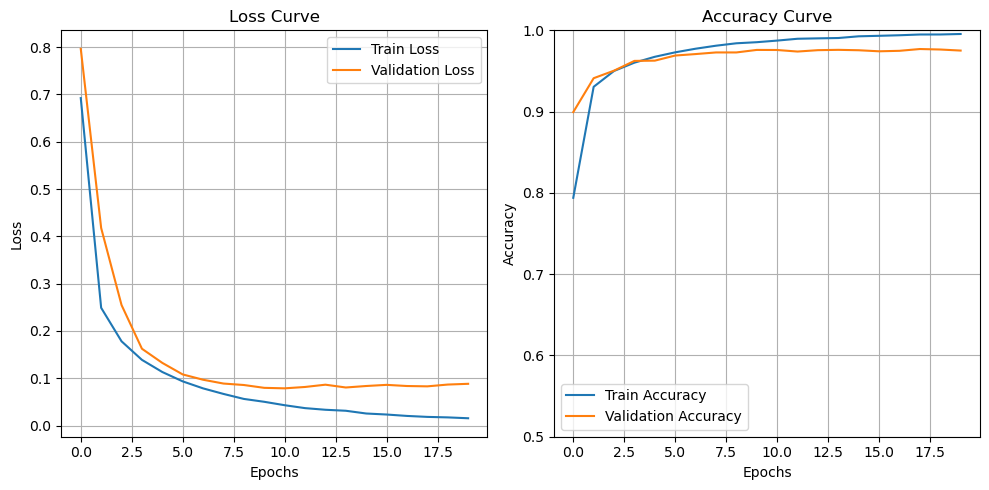

In [49]:
trainLoss = model.history.history["loss"]
valLoss = model.history.history["val_loss"]

train_acc = model.history.history['accuracy']
valAcc = model.history.history['val_accuracy']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Loss Curve
axes[0].plot(trainLoss, label="Train Loss")
axes[0].plot(valLoss, label="Validation Loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].set_title("Loss Curve")
axes[0].legend()
axes[0].grid()

# Accuracy Curve
axes[1].plot(train_acc, label="Train Accuracy")
axes[1].plot(valAcc, label="Validation Accuracy")
axes[1].set_ylim(0.5, 1)
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Accuracy Curve")
axes[1].legend()
axes[1].grid()

# Show plots
plt.tight_layout()
plt.show()

In [25]:
print(train_acc[-1])
print(valAcc[-1])

0.996233344078064
0.9760000109672546


In [ ]:
predictClass = model.predict(xTest)
predictClass = np.argmax(predictClass, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Image 1: Predicted = 7, Actual = 7
Image 2: Predicted = 2, Actual = 2
Image 3: Predicted = 1, Actual = 1
Image 4: Predicted = 0, Actual = 0
Image 5: Predicted = 4, Actual = 4
Image 6: Predicted = 1, Actual = 1
Image 7: Predicted = 4, Actual = 4
Image 8: Predicted = 9, Actual = 9
Image 9: Predicted = 5, Actual = 5
Image 10: Predicted = 9, Actual = 9


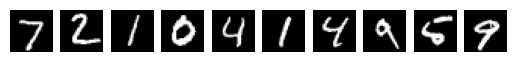

In [ ]:
for i in range(10):
    plt.subplot(1, 10, i + 1)  # Create a row of subplots
    plt.imshow(xTest[i].reshape(28, 28), cmap='gray')  # Reshape to 28x28
    plt.axis('off')  # Hide axis for clarity
    print(f"Image {i+1}: Predicted = {predictClass[i]}, Actual = {np.argmax(yTest[i])}")

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,840 (1.20 MB)

 Trainable params: 105,194 (410.91 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 210,390 (821.84 KB)